In [1]:
# Deep Learning Fundamentals: MNIST Case Study
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

### Data Collection

In [5]:
import requests

# URLs of the files
data_train_features_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module7/exercise/X_train.pth'
data_train_labels_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module7/exercise/y_train.pth'
data_test_features_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module7/exercise/X_test.pth'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(data_train_features_url, 'X_train.pth')
download_file(data_train_labels_url, 'y_train.pth')
download_file(data_test_features_url, 'X_test.pth')

Downloaded X_train.pth from https://www.raphaelcousin.com/modules/data-science-practice/module7/exercise/X_train.pth
Downloaded y_test.pth from https://www.raphaelcousin.com/modules/data-science-practice/module7/exercise/y_test.pth
Downloaded X_test.pth from https://www.raphaelcousin.com/modules/data-science-practice/module7/exercise/X_test.pth


In [8]:
import torch

# Load the saved tensors
X = torch.load('X_train.pth')
y = torch.load('y_train.pth')

# Print shapes to verify the data
print("Dataset shapes:")
print(f"X_train: {X.shape}")  # Should be torch.Size([50000, 28, 28])
print(f"y_train: {y.shape}")  # Should be torch.Size([50000])

# Example: access the first image and its label
first_image = X[0]
first_label = y[0]

print(f"\nFirst image shape: {first_image.shape}")  # Should be torch.Size([3, 32, 32])
print(f"First image label: {first_label}")         # Should be a number between 0-9

/tmp/ipykernel_28584/3425421334.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  X = torch.load('X_train.pth')


Dataset shapes:
X_train: torch.Size([50000, 3, 32, 32])
y_train: torch.Size([50000])

First image shape: torch.Size([3, 32, 32])
First image label: 6


/tmp/ipykernel_28584/3425421334.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  y = torch.load('y_train.pth')


### Data Analysis

In [9]:
X.shape

torch.Size([50000, 3, 32, 32])

In [10]:
y.shape

torch.Size([50000])

In [11]:
def plot_images(X, y, num_examples=5, figsize=(15, 3)):
    # Create figure
    fig, axes = plt.subplots(1, num_examples, figsize=figsize)
    
    # Ensure axes is always a numpy array
    if num_examples == 1:
        axes = np.array([axes])
    
    # Plot each example
    for i in range(num_examples):
        # Get the image
        img = np.array(X[i]).astype(int)
        
        # If the image has 3 dimensions, transpose it to (height, width, channels)
        if img.ndim == 3 and img.shape[0] == 3:  # Shape is (3, height, width)
            img = np.transpose(img, (1, 2, 0))  # Convert to (height, width, channels)
        
        # Plot the image
        axes[i].imshow(img)
        axes[i].set_title(f'Label: {y[i]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    return fig

/tmp/ipykernel_28584/2675572916.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img = np.array(X[i]).astype(int)


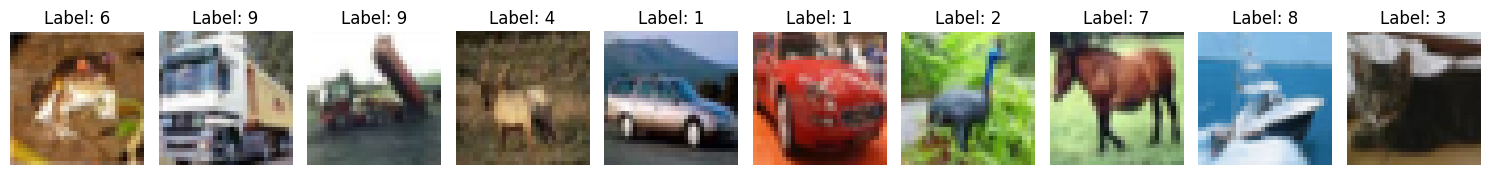

In [12]:
# Plot some examples
fig = plot_images(X, y, num_examples=10)
plt.show()

### Data Preprocessing
Scale, split the data and create dataLoaders

In [ ]:
def preprocess_data(X, y, batch_size=32, train_size=0.7, val_size=0.15, random_state=42):
    return data_loader_train, data_loader_val, data_loader_test

### Model
Create a simple model with right input output and define criterion and criterion/loss

In [ ]:
def create_model():
    return model, criterion, optimizer

### Train
Create a loop to train your model

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer):
    history = defaultdict(list)
    for epoch in range(num_epochs):
        ...
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
    return history

In [ ]:
# Create model and training components
model, criterion, optimizer = create_model(device)

# Train the model
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=10
)

In [ ]:
def plot_training_history(history):
    """
    Plot training history
    
    Parameters:
    -----------
    history : dict
        Training history containing metrics
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 1, figsize=(10, 10))
    
    # Plot loss
    ax1.plot(history['train_loss'], label='Train Loss')
    ax1.plot(history['val_loss'], label='Val Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Plot accuracy
    ax2.plot(history['train_acc'], label='Train Acc')
    ax2.plot(history['val_acc'], label='Val Acc')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    return fig

In [ ]:
# Plot training history
plot_training_history(history)
plt.show()

In [ ]:
### Improve your model and trainning

In [ ]:
### Use Transfer Learning

### Generating Submission File

In [13]:
X_test = torch.load('X_test.pth')

/tmp/ipykernel_28584/3810787237.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  X_test = torch.load('X_test.pth')


In [14]:
X_test.shape

torch.Size([10000, 3, 32, 32])

In [ ]:
X_test = torch.load('X_test.pth')
X_test_scaled = # apply same scale as train

In [ ]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    predictions = model(X_test_scaled)

In [ ]:
_, predicted_labels = torch.max(predictions, dim=1)

In [ ]:
submission = pd.DataFrame({
    'index': np.arange(len(X_test)),
    'label': 0 # predicted_labels
})

submission.to_csv('submission.csv', index=False, sep=',')
submission.head()